### Baixa e instala as dependencias

In [1]:
!pip install -r requirements.txt

## Pré-processamento
Verifica caracter especial que não segue o padrao de estruturação dos dados

In [2]:
# Importing python declarations
%run utils.py
%run preprocessing.py
data_preprocessing()


PermissionError: [Errno 13] Permission denied: './data/teste.csv'

PermissionError: [Errno 13] Permission denied: './data/teste.csv'

In [3]:
temp

True

- Trecho de código do Victor/Daniel para arrumar os valores null da linha 2812

### Pre-processamento dos dados

reorganiza os dados com quebra de linha desnecessária. ex: 6111e2f4e0aeb0f03318c085 - All Amazon Workers Must Wear Masks.

In [36]:
data = pd.read_csv('./data/news_data_final.csv')

In [37]:
colunas = list(data.columns)
clean_dataset = data.copy()
last_value = clean_dataset['_id'][2813]

for i in range(1,len(colunas)):
    last_value = data[colunas[i]][2813]
    clean_dataset[colunas[i]][2813] = data[colunas[i-1]][2813]

clean_dataset["_id"][2813] = data["_id"][2812]
clean_dataset["title"][2813] = data["title"][2812]

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6811 entries, 0 to 6810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        6811 non-null   object
 1   title      6811 non-null   object
 2   date       6810 non-null   object
 3   text       6784 non-null   object
 4   url        6810 non-null   object
 5   craw_date  6810 non-null   object
 6   crawler    6809 non-null   object
dtypes: object(7)
memory usage: 372.6+ KB


# Missing Values
Primeiramente, verificamos valores ausentes em cada coluna

## Crawler

In [20]:
data["crawler"].unique()

array(['Futurity', 'MIT News', 'SCI News', 'R&D World', 'Science News',
       'Science Alert', 'The Scientist', 'News Medical',
       'World Pharma News', 'Medical Xpress', 'Medical News Today',
       'Live Science', 'Research Live', 'Health Day',
       'Smithsonian Magazine', 'The Bottom Line', 'Tech News World',
       'Institut Pasteur', 'Broad Institute', 'Wyss Institute', 'Nature',
       'CMAJ News', 'IEEE Spectrum', nan], dtype=object)

In [21]:
data[data["crawler"].isna()]

_id                               title  \
2812  6111e2f4e0aeb0f03318c085  All Amazon Workers Must Wear Masks   
2813                         ​                          2021-08-09   

                                                   date  \
2812                                                NaN   
2813  MONDAY, Aug. 9, 2021 (HealthDay News) -- All A...   

                                                   text         url  \
2812                                                NaN         NaN   
2813  https://consumer.healthday.com/all-amazon-work...  2021-08-09   

       craw_date crawler  
2812         NaN     NaN  
2813  Health Day     NaN

Aqui podemos notar que talvez o crawler tenha separado a observação em duas linhas diferentes.
De fato ao entrarmos na url que está contido na variável texto da linha 2813 nos deparamos com o artigo na Health Day com o título da linha 2812 e o texto que está contido na variável date da linha 2812.

## _id

In [62]:
data[data["_id"].isna()]

Empty DataFrame
Columns: [_id, title, date, text, url, craw_date, crawler]
Index: []

Aparentemente não temos repetição de id

## Date

In [64]:
data[data["date"].isna()]

_id                               title date text  \
2812  6111e2f4e0aeb0f03318c085  All Amazon Workers Must Wear Masks  NaN  NaN   

      url craw_date crawler  
2812  NaN       NaN     NaN

A única linha sem a data da noticia támbem não contem diversas outras variáveis e como já observamos anteriormente talvez essas informações estejam na linha 2813

## Text

In [9]:
data[data["text"].isna()]

_id  \
896             61073a290f87cd311d76ffea   
904             61073a290f87cd311d76fff2   
960             61073a290f87cd311d77002a   
1242            61073a290f87cd311d770144   
1257            61073a290f87cd311d770153   
1416            61073a290f87cd311d7701f2   
1501            61073a290f87cd311d770247   
1689            6107e3469258407b5cc4973d   
2011            6109733ee682b1abb73b5886   
2193            610b10c852e223122e18a5ec   
2288            610bd879fa34bdc6d0cbaa74   
2498            610d285c7ba9c5eaaa04caf1   
2690            611129bb94d359fbe678c277   
2812            6111e2f4e0aeb0f03318c085   
2865            61127a71cadb18d0812295c4   
3053            6113fea3576e4602f97bfa38   
3411            6116763a143ee7229fa07390   
3569  ObjectId(611a616bdeab6b2ce1759b6c)   
3722  ObjectId(611ba39ce68d37b8b887d09d)   
3876  ObjectId(611d050ed2156fcd379cfe03)   
5896  ObjectId(6137c8245b91a7bc94f807d7)   
5970  ObjectId(6138b7b2570bc8f0bb71c835)   
6090  ObjectId(613a09643a5495b5910cefcb)   
6222  ObjectId(613b5aecc0249288d0e50a8c)   
6422  ObjectId(613f4f24227045190610b569)   
6551  ObjectId(6140a09481cd7825e8c98135)   
6807  ObjectId(614343a804dc2b673fa0ad14)   

                                                  title        date text  \
896   Improved Air Quality Boosts Brain Health and C...  2021-07-27  NaN   
904             Cold Weather Workouts May Burn More Fat  2020-12-30  NaN   
960   Cancer Misinformation Is Common Online, New St...  2021-07-28  NaN   
1242       Testosterone's Ties to Success May Be a Myth  2021-07-29  NaN   
1257  HealthDay Now: Alzheimer’s Drug Approval Harms...  2021-07-29  NaN   
1416  Two new proteins identified as therapeutic tar...  2021-07-29  NaN   
1501  Children Diagnosed with Type 2 Diabetes at Ris...  2021-07-30  NaN   
1689  Kids Exposed to Secondhand Pot Smoke Get More ...  2021-08-02  NaN   
2011         No Sign COVID Raises Risk of Preterm Birth  2021-08-03  NaN   
2193  More Americans Are Anemic Due to Changes in th...  2021-08-04  NaN   
2288     Smoggy Air May Trigger Sinusitis, Study Finds.  2021-08-05  NaN   
2498  Vitamin D Not Effective for Treating IBS, Stud...  2021-08-06  NaN   
2690  Checklist to prepare older children and teens ...  2021-08-09  NaN   
2812                 All Amazon Workers Must Wear Masks         NaN  NaN   
2865              Could COVID-19 Be Eradicated One Day?  2021-08-10  NaN   
3053  U.S. Kids Are Eating More 'Ultra-Processed' Foods  2021-08-11  NaN   
3411  Your Metabolism Changes as You Age, Just Not W...  2021-08-13  NaN   
3569  More Movement, Less Screen Time Protects Kids’...  2021-08-16  NaN   
3722  Social Media ‘Likes,’ ‘Shares’ and ‘Retweets’ ...  2021-08-17  NaN   
3876  Dangerous Diabetes Tied to Pregnancy Is on the...  2021-08-18  NaN   
5896  Recent Pot Use Tied to Heart Attacks in Young ...  2021-09-07  NaN   
5970  Kids with Eczema at Risk for Depression, Study...  2021-09-08  NaN   
6090  HealthDay Now: Where Are COVID Booster Shots N...  2021-09-09  NaN   
6222  Working in an Office Can Trigger Asthma, Study...  2021-09-10  NaN   
6422  Stress Can Raise Blood Pressure Over Time, Stu...  2021-09-13  NaN   
6551    Diet May Impact Your COVID-19 Risk, Study Finds  2021-09-14  NaN   
6807  Regular Exercise Can Lower Anxiety Risk by Mor...  2021-09-16  NaN   

                                                    url   craw_date  \
896   https://consumer.healthday.com/improved-air-qu...  2021-07-27   
904   https://consumer.healthday.com/cold-weather-wo...  2021-07-27   
960   https://consumer.healthday.com/cancer-misinfor...  2021-07-28   
1242  https://consumer.healthday.com/b-7-29-testoste...  2021-07-29   
1257  https://consumer.healthday.com/healthday-now-a...  2021-07-29   
1416  https://www.news-medical.net/news/20210729/Two...  2021-07-29   
1501  https://consumer.healthday.com/children-diagno...  2021-07-30   
1689  https://consumer.healthday.com/kids-exposed-to...  2021-08-02   
2011  https://consumer.healthday.com

A maior parte das observações sem texto são do site Health Day e ao abrir diversas dessas notícias notamos que a notícia é dada em formato de video

## url

In [68]:
data[data["url"].isna()]

_id                               title date text  \
2812  6111e2f4e0aeb0f03318c085  All Amazon Workers Must Wear Masks  NaN  NaN   

      url craw_date crawler  
2812  NaN       NaN     NaN

A única linha sem a data da noticia támbem não contem diversas outras variáveis e como já observamos anteriormente talvez essas informações estejam na linha 2813

## Craw Date

In [69]:
data[data["craw_date"].isna()]

_id                               title date text  \
2812  6111e2f4e0aeb0f03318c085  All Amazon Workers Must Wear Masks  NaN  NaN   

      url craw_date crawler  
2812  NaN       NaN     NaN

A única linha sem a data da noticia támbem não contem diversas outras variáveis e como já observamos anteriormente talvez essas informações estejam na linha 2813

## Title

In [70]:
data[data["title"].isna()]

Empty DataFrame
Columns: [_id, title, date, text, url, craw_date, crawler]
Index: []

# Valores duplicados

## Title & text

In [71]:
data[data.title.duplicated()]

_id  \
66              61073a280f87cd311d76fcac   
953             61073a290f87cd311d770023   
955             61073a290f87cd311d770025   
956             61073a290f87cd311d770026   
1117            61073a290f87cd311d7700c7   
...                                  ...   
6282  ObjectId(613bbd161c095938453504a1)   
6337  ObjectId(613cac2bd09b11bc87a5a91f)   
6472  ObjectId(613fb1983f07ffdc66cae391)   
6653  ObjectId(6141f1636384314081733194)   
6694  ObjectId(614250c963aaf1cb9ef77be5)   

                                                  title        date  \
66    Synthetic biology circuits can respond within ...  2021-07-02   
953   CDC to Advise Return to Masks Indoors for Some...  2021-07-27   
955   Pfizer, Moderna to Expand Vaccine Studies in Y...  2021-07-27   
956       Long COVID May Qualify as a Disability: Biden  2021-07-27   
1117  Vaccinated Americans Can Soon Visit the U.K. W...  2021-07-28   
...                                                 ...         ...   
6282  Biden Issues Tough New Vaccine Mandates Affect...  2021-09-10   
6337    Physician's Briefing Weekly Coronavirus Roundup  2021-09-10   
6472  COVID-19 long-haulers at risk of developing ki...  2021-09-08   
6653  How a plant virus could protect and save your ...  2021-09-14   
6694  New programmable gene editing proteins found o...  2021-09-15   

                                                   text  \
66    By Anne Trafton | MIT News Office A new type o...   
953   TUESDAY, July 27, 2021 (HealthDay News) -- The...   
955   TUESDAY, July 27, 2021 (HealthDay News) -- Pfi...   
956   TUESDAY, July 27, 2021 (HealthDay News) -- Ser...   
1117  WEDNESDAY, July 28, 2021 (HealthDay News) -- S...   
...                                                 ...   
6282  FRIDAY, Sept. 10, 2021 (HealthDay News) -- In ...   
6337  Here is what the editors at Physician's Briefi...   
6472  Researchers have uncovered a trajectory of sig...   
6653  Using a virus that grows in black-eyed pea pla...   
6694  Within the last decade, scientists have adapte...   

                                                    url   craw_date  \
66    https://www.rdworldonline.com/synthetic-biolog...  2021-07-07   
953   https://consumer.healthday.com/cdc-to-advise-r...  2021-07-28   
955   https://consumer.healthday.com/pfizer-moderna-...  2021-07-28   
956   https://consumer.healthday.com/long-covid-may-...  2021-07-28   
1117  https://consumer.healthday.com/vaccinated-amer...  2021-07-28   
...                                                 ...         ...   
6282  https://consumer.healthday.com/biden-issues-to...  2021-09-10   
6337  https://consumer.healthday.com/physician-s-bri...  2021-09-11   
6472  https://www.medicalnewstoday.com/articles/covi...  2021-09-13   
6653  https://medicalxpress.com/news/2021-09-virus-l...  2021-09-15   
6694  https://news.mit.edu/2021/new-programmable-gen...  2021-09-15   

                 crawler  
66             R&D World  
953           Health Day  
955           Health Day  
956           Health Day  
1117          Health Day  
...                  ...  
6282          Health Day  
6337          Health Day  
6472  Medical News Today  
6653      Medical Xpress  
6694            MIT News  

[75 rows x 7 columns]

In [12]:
data[data.text.duplicated()]

_id  \
1958            610955d66c5e84f2312a5726   
3541  ObjectId(611a615fdeab6b2ce1759b43)   
4201  ObjectId(61200bc5777e65c44b0fad02)   
4384  ObjectId(61240241befb2869ab77e1cd)   
4517  ObjectId(61263ed8140404b3e3eb1247)   
5945  ObjectId(6138b6e1570bc8f0bb71c813)   
6610  ObjectId(61410324d9662f593b639887)   

                                                  title        date  \
1958  Dental mitigation strategies to reduce aerosol...  2021-08-03   
3541  Study explores how racial minorities have been...  2021-08-16   
4201  Robot Could Operate a Docking Station Inside t...  2021-08-18   
4384               A DIY E-bike Conversion on the Cheap  2021-08-20   
4517             School of Science welcomes new faculty  2021-08-24   
5945  Efforts grow to stamp out use of parasite drug...  2021-09-07   
6610         Is This the End for Lithium-ion Batteries?  2021-09-11   

                                                   text  \
1958  Limiting infection transmission is central to ...   
3541  Racial minorities comprise around a quarter of...   
4201  Picture, if you will, a cargo rocket launching...   
4384  In 2009, I wrote in these pages about my effor...   
4517  This fall, MIT welcomes new faculty members — ...   
5945  Health experts and medical groups are pushing ...   
6610  After years of anticipation, sodium-ion batter...   

                                                    url   craw_date  \
1958  https://medicalxpress.com/news/2021-08-dental-...  2021-08-03   
3541  https://www.news-medical.net/news/20210816/Stu...  2021-08-16   
4201  https://spectrum.ieee.org/implantable-medical-...  2021-08-20   
4384            https://spectrum.ieee.org/electric-bike  2021-08-23   
4517  https://news.mit.edu/2021/school-science-welco...  2021-08-25   
5945  https://medicalxpress.com/news/2021-09-efforts...  2021-09-08   
6610  https://spectrum.ieee.org/graphene-sodium-ion-...  2021-09-14   

             crawler  
1958  Medical Xpress  
3541    News Medical  
4201   IEEE Spectrum  
4384   IEEE Spectrum  
4517        MIT News  
5945  Medical Xpress  
6610   IEEE Spectrum

- Temos 75 títulos repetidos, porém somente 7 textos repetidos

In [73]:
data[data.title.duplicated(keep=False)].head(2)

_id  \
20  61073a280f87cd311d76fc7e   
66  61073a280f87cd311d76fcac   

                                                title        date  \
20  Synthetic biology circuits can respond within ...  2021-07-01   
66  Synthetic biology circuits can respond within ...  2021-07-02   

                                                 text  \
20  Synthetic biology offers a way to engineer cel...   
66  By Anne Trafton | MIT News Office A new type o...   

                                                  url   craw_date    crawler  
20  https://news.mit.edu/2021/synthetic-biology-ci...  2021-07-07   MIT News  
66  https://www.rdworldonline.com/synthetic-biolog...  2021-07-07  R&D World

- Verificando um caso de repetição de título com textos diferentes, podemos ver que os textos são somente minimamente diferentes (prov. diferenças do site em que o artigo foi pego, etc)
- Até que ponto podemos ter certeza que isso ocorre para todos os textos, de forma que possamos excluir essas linhas, considerando que são duplicadas? (lembrando que se trata de title e não text)
- Que estratégia adotar para limpar repetições? (data mais recente, origem do artigo, etc.)

# Limpeza dos dados

### _id

- É possível observar algum ruído em algumas das linhas da coluna id (ids encapsulados por ObjectId(...))
- Abaixo, vemos o tamanho das strings do id para verificar algum padrão

In [39]:
data['id_len'] = data._id.apply(lambda x: len(x))

In [40]:
data.id_len.unique()

array([24,  1, 34], dtype=int64)

- Somente ids de tamanho 24, 1 (linha mal processada vista anteriormente) e 34 -> ao que tudo indica, só temos as strings com ObjectId(...) de ruído nos dados

In [41]:
data._id = data._id.str.replace('ObjectId\(', '')
data._id = data._id.str.replace(')', '')
data.drop(labels='id_len', axis=1, inplace=True)

C:\Users\DANIEL~1.LEB\AppData\Local\Temp/ipykernel_5048/1017907872.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data._id = data._id.str.replace('ObjectId\(', '')
C:\Users\DANIEL~1.LEB\AppData\Local\Temp/ipykernel_5048/1017907872.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data._id = data._id.str.replace(')', '')


Tratando os problemas identificados nas linhas 2812/2813 do DataFrame

In [42]:
colunas = list(data.columns)
clean_dataset = data.copy()
last_value = clean_dataset['_id'][2813]

for i in range(1,len(colunas)):
    last_value = data[colunas[i]][2813]
    clean_dataset[colunas[i]][2813] = data[colunas[i-1]][2813]
    
clean_dataset["_id"][2813] = data["_id"][2812]
clean_dataset["title"][2813] = data["title"][2812]
clean_dataset.drop(2812, inplace=True)

In [43]:
clean_dataset.loc[2811:2813]

_id  \
2811  6111e2f4e0aeb0f03318c084   
2813  6111e2f4e0aeb0f03318c085   

                                                  title        date  \
2811  SARS-CoV-2 Reinfection More Likely in Unvaccin...  2021-08-09   
2813                 All Amazon Workers Must Wear Masks  2021-08-09   

                                                   text  \
2811  MONDAY, Aug. 9, 2021 (HealthDay News) -- Among...   
2813  MONDAY, Aug. 9, 2021 (HealthDay News) -- All A...   

                                                    url   craw_date  \
2811  https://consumer.healthday.com/sars-cov-2-rein...  2021-08-09   
2813  https://consumer.healthday.com/all-amazon-work...  2021-08-09   

         crawler  
2811  Health Day  
2813  Health Day

In [44]:
data = clean_dataset
data

_id  \
0     61073a280f87cd311d76fc6a   
1     61073a280f87cd311d76fc6b   
2     61073a280f87cd311d76fc6c   
3     61073a280f87cd311d76fc6d   
4     61073a280f87cd311d76fc6e   
...                        ...   
6806  614343a804dc2b673fa0ad13   
6807  614343a804dc2b673fa0ad14   
6808  614343a804dc2b673fa0ad15   
6809  614343a904dc2b673fa0ad16   
6810  614343c504dc2b673fa0ad28   

                                                  title        date  \
0     COVID-19 vaccines likely activate strong, last...  2021-07-06   
1             Why some horses lose the ability to sweat  2021-06-23   
2       Is climate change making allergy season longer?  2021-07-06   
3         Chestnut leaf molecule disarms staph bacteria  2021-07-06   
4     Scales show massive shark decline since prehis...  2021-07-07   
...                                                 ...         ...   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   
6807  Regular Exercise Can Lower Anxiety Risk by Mor...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
0     Researchers have found evidence that the immun...   
1     For the first time, researchers have identifie...   
2     Researchers have found that changes in tempera...   
3     A molecule extracted from European chestnut tr...   
4     Shark abundance in Caribbean Panama has declin...   
...                                                 ...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6807                                                NaN   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
0     https://www.futurity.org/how-long-does-covid-1...  2021-07-07   
1     https://www.futurity.org/horses-sweat-chronic-...  2021-07-07   
2     https://www.futurity.org/climate-change-allerg...  2021-07-07   
3     https://www.futurity.org/chestnut-leaf-bacteri...  2021-07-07   
4     https://www.futurity.org/shark-scales-fossils-...  2021-07-07   
...                                                 ...         ...   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   
6807  https://consumer.healthday.com/regular-exercis...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

         crawler  
0       Futurity  
1       Futurity  
2       Futurity  
3       Futurity  
4       Futurity  
...          ...  
6806  Health Day  
6807  Health Day  
6808  Health Day  
6809  Health Day  
6810      Nature  

[6810 rows x 7 columns]

## Limpeza 2.0:

- Se tiver duplicado, pega a primeira informação
- Excluir os que são vídeo
- Scikit separar o crawler em 70,30

In [45]:
#Excluindo os que são vídeos
index_deletar = data[data['text'].isna()].index.tolist()
data = data.drop(index_deletar)

In [46]:
data[data['text'].isna()]

Empty DataFrame
Columns: [_id, title, date, text, url, craw_date, crawler]
Index: []

In [47]:
data

_id  \
0     61073a280f87cd311d76fc6a   
1     61073a280f87cd311d76fc6b   
2     61073a280f87cd311d76fc6c   
3     61073a280f87cd311d76fc6d   
4     61073a280f87cd311d76fc6e   
...                        ...   
6805  614343a804dc2b673fa0ad12   
6806  614343a804dc2b673fa0ad13   
6808  614343a804dc2b673fa0ad15   
6809  614343a904dc2b673fa0ad16   
6810  614343c504dc2b673fa0ad28   

                                                  title        date  \
0     COVID-19 vaccines likely activate strong, last...  2021-07-06   
1             Why some horses lose the ability to sweat  2021-06-23   
2       Is climate change making allergy season longer?  2021-07-06   
3         Chestnut leaf molecule disarms staph bacteria  2021-07-06   
4     Scales show massive shark decline since prehis...  2021-07-07   
...                                                 ...         ...   
6805  Why Are More U.S. Babies Being Born With Syphi...  2021-09-16   
6806  NIH Spending Nearly $470 Million on Long-Haul ...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
0     Researchers have found evidence that the immun...   
1     For the first time, researchers have identifie...   
2     Researchers have found that changes in tempera...   
3     A molecule extracted from European chestnut tr...   
4     Shark abundance in Caribbean Panama has declin...   
...                                                 ...   
6805  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6806  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
0     https://www.futurity.org/how-long-does-covid-1...  2021-07-07   
1     https://www.futurity.org/horses-sweat-chronic-...  2021-07-07   
2     https://www.futurity.org/climate-change-allerg...  2021-07-07   
3     https://www.futurity.org/chestnut-leaf-bacteri...  2021-07-07   
4     https://www.futurity.org/shark-scales-fossils-...  2021-07-07   
...                                                 ...         ...   
6805  https://consumer.healthday.com/9-16-why-are-mo...  2021-09-16   
6806  https://consumer.healthday.com/b-9-16-nih-spen...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

         crawler  
0       Futurity  
1       Futurity  
2       Futurity  
3       Futurity  
4       Futurity  
...          ...  
6805  Health Day  
6806  Health Day  
6808  Health Day  
6809  Health Day  
6810      Nature  

[6784 rows x 7 columns]

In [48]:
# data.date = data.to_datetime(data['date'],format='%Y-%m-%d')

data = data.sort_values(by="date")

In [49]:
data

_id  \
6368  613e60a6160b54305a91ae1b   
6158  613a6c8ca6c2885c65159772   
2228  610b10e852e223122e18a625   
1909  610945d508af52aee8b60c2b   
1081  61073a290f87cd311d7700a3   
...                        ...   
6770  614342e104dc2b673fa0ace6   
6774  614342e104dc2b673fa0acea   
6776  614342e104dc2b673fa0acec   
6757  614342dd04dc2b673fa0acd5   
6810  614343c504dc2b673fa0ad28   

                                                  title        date  \
6368                       Morris Chang: Foundry Father  2011-04-19   
6158            The Strange Birth and Long Life of Unix  2011-11-28   
2228                          The STEM Crisis Is a Myth  2013-08-30   
1909  London’s Crossrail Is a $21 Billion Test of Vi...  2016-03-24   
1081  Toxins from the world’s longest animal can kil...  2018-03-30   
...                                                 ...         ...   
6770  Research breakthrough could protect against br...  2021-09-16   
6774  Parents, take the school holidays pressure off...  2021-09-16   
6776                      Psychosis risk linked to cats  2021-09-16   
6757  Novel combination therapy approach to keep leu...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
6368  Even in the very anomalous category of tech en...   
6158  They say that when one door closes on you, ano...   
2228  You must have seen the warning a thousand time...   
1909  As the River Thames meanders eastward through ...   
1081  Bootlace worms with spooky-stretchy bodies sec...   
...                                                 ...   
6770  Leading scientists have identified a possible ...   
6774  If you're a parent feeling a modicum of dread ...   
6776  Exposure to toxoplasma, a disease carried by c...   
6757  In chronic leukemias, blocking the overactive ...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
6368  https://spectrum.ieee.org/morris-chang-foundry...  2021-09-12   
6158  https://spectrum.ieee.org/the-strange-birth-an...  2021-09-09   
2228  https://spectrum.ieee.org/the-stem-crisis-is-a...  2021-08-04   
1909  https://spectrum.ieee.org/londons-crossrail-is...  2021-08-03   
1081  https://www.sciencenews.org/article/toxins-boo...  2021-07-28   
...                                                 ...         ...   
6770  https://medicalxpress.com/news/2021-09-breakth...  2021-09-16   
6774  https://medicalxpress.com/news/2021-09-parents...  2021-09-16   
6776  https://medicalxpress.com/news/2021-09-psychos...  2021-09-16   
6757  https://www.news-medical.net/news/20210916/Nov...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

             crawler  
6368   IEEE Spectrum  
6158   IEEE Spectrum  
2228   IEEE Spectrum  
1909   IEEE Spectrum  
1081    Science News  
...              ...  
6770  Medical Xpress  
6774  Medical Xpress  
6776  Medical Xpress  
6757    News Medical  
6810          Nature  

[6784 rows x 7 columns]

In [50]:
data[data.text.duplicated()]

_id  \
1958  610955d66c5e84f2312a5726   
3541  611a615fdeab6b2ce1759b43   
4076  611eb95829e8f91c7e74063d   
4255  61224a82dd226bbc473175f6   
4460  61254fc8757f21bb34ddc29a   
5945  6138b6e1570bc8f0bb71c813   
6610  61410324d9662f593b639887   

                                                  title        date  \
1958  Dental mitigation strategies to reduce aerosol...  2021-08-03   
3541  Study explores how racial minorities have been...  2021-08-16   
4076  Robot Could Operate a Docking Station Inside t...  2021-08-18   
4255               A DIY E-bike Conversion on the Cheap  2021-08-20   
4460             School of Science welcomes new faculty  2021-08-24   
5945  Efforts grow to stamp out use of parasite drug...  2021-09-07   
6610         Is This the End for Lithium-ion Batteries?  2021-09-11   

                                                   text  \
1958  Limiting infection transmission is central to ...   
3541  Racial minorities comprise around a quarter of...   
4076  Picture, if you will, a cargo rocket launching...   
4255  In 2009, I wrote in these pages about my effor...   
4460  This fall, MIT welcomes new faculty members — ...   
5945  Health experts and medical groups are pushing ...   
6610  After years of anticipation, sodium-ion batter...   

                                                    url   craw_date  \
1958  https://medicalxpress.com/news/2021-08-dental-...  2021-08-03   
3541  https://www.news-medical.net/news/20210816/Stu...  2021-08-16   
4076  https://spectrum.ieee.org/robot-operates-docki...  2021-08-19   
4255  https://spectrum.ieee.org/a-diy-e-bike-convers...  2021-08-22   
4460  https://news.mit.edu/2021/school-science-welco...  2021-08-24   
5945  https://medicalxpress.com/news/2021-09-efforts...  2021-09-08   
6610  https://spectrum.ieee.org/graphene-sodium-ion-...  2021-09-14   

             crawler  
1958  Medical Xpress  
3541    News Medical  
4076   IEEE Spectrum  
4255   IEEE Spectrum  
4460        MIT News  
5945  Medical Xpress  
6610   IEEE Spectrum

In [51]:
data.drop_duplicates(subset=['text'], keep='first', inplace = True)

In [52]:
data

_id  \
6368  613e60a6160b54305a91ae1b   
6158  613a6c8ca6c2885c65159772   
2228  610b10e852e223122e18a625   
1909  610945d508af52aee8b60c2b   
1081  61073a290f87cd311d7700a3   
...                        ...   
6770  614342e104dc2b673fa0ace6   
6774  614342e104dc2b673fa0acea   
6776  614342e104dc2b673fa0acec   
6757  614342dd04dc2b673fa0acd5   
6810  614343c504dc2b673fa0ad28   

                                                  title        date  \
6368                       Morris Chang: Foundry Father  2011-04-19   
6158            The Strange Birth and Long Life of Unix  2011-11-28   
2228                          The STEM Crisis Is a Myth  2013-08-30   
1909  London’s Crossrail Is a $21 Billion Test of Vi...  2016-03-24   
1081  Toxins from the world’s longest animal can kil...  2018-03-30   
...                                                 ...         ...   
6770  Research breakthrough could protect against br...  2021-09-16   
6774  Parents, take the school holidays pressure off...  2021-09-16   
6776                      Psychosis risk linked to cats  2021-09-16   
6757  Novel combination therapy approach to keep leu...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
6368  Even in the very anomalous category of tech en...   
6158  They say that when one door closes on you, ano...   
2228  You must have seen the warning a thousand time...   
1909  As the River Thames meanders eastward through ...   
1081  Bootlace worms with spooky-stretchy bodies sec...   
...                                                 ...   
6770  Leading scientists have identified a possible ...   
6774  If you're a parent feeling a modicum of dread ...   
6776  Exposure to toxoplasma, a disease carried by c...   
6757  In chronic leukemias, blocking the overactive ...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
6368  https://spectrum.ieee.org/morris-chang-foundry...  2021-09-12   
6158  https://spectrum.ieee.org/the-strange-birth-an...  2021-09-09   
2228  https://spectrum.ieee.org/the-stem-crisis-is-a...  2021-08-04   
1909  https://spectrum.ieee.org/londons-crossrail-is...  2021-08-03   
1081  https://www.sciencenews.org/article/toxins-boo...  2021-07-28   
...                                                 ...         ...   
6770  https://medicalxpress.com/news/2021-09-breakth...  2021-09-16   
6774  https://medicalxpress.com/news/2021-09-parents...  2021-09-16   
6776  https://medicalxpress.com/news/2021-09-psychos...  2021-09-16   
6757  https://www.news-medical.net/news/20210916/Nov...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

             crawler  
6368   IEEE Spectrum  
6158   IEEE Spectrum  
2228   IEEE Spectrum  
1909   IEEE Spectrum  
1081    Science News  
...              ...  
6770  Medical Xpress  
6774  Medical Xpress  
6776  Medical Xpress  
6757    News Medical  
6810          Nature  

[6777 rows x 7 columns]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 6368 to 6810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        6777 non-null   object
 1   title      6777 non-null   object
 2   date       6777 non-null   object
 3   text       6777 non-null   object
 4   url        6777 non-null   object
 5   craw_date  6777 non-null   object
 6   crawler    6777 non-null   object
dtypes: object(7)
memory usage: 423.6+ KB


<AxesSubplot:>

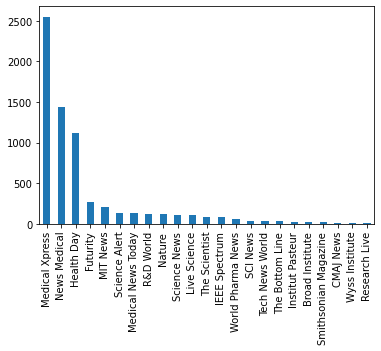

In [54]:
data.crawler.value_counts().plot(kind='bar')

In [65]:
X_train, X_teste = train_test_split(data, test_size = .3, stratify = data[['crawler']])

In [66]:
X_train

_id  \
4816  6128e4e32939a73da3eea14c   
5398  6130cddfb58f3a63b65b3b79   
1947  610955d66c5e84f2312a571b   
6132  613a6ad3a6c2885c6515973a   
1489  61073a290f87cd311d77023b   
...                        ...   
5105  612e27d8fd05dbab33c66d22   
4718  61279435bab06e425f63a68a   
416   61073a280f87cd311d76fe0a   
1149  61073a290f87cd311d7700e7   
3701  611ba2e1e68d37b8b887d07f   

                                                  title        date  \
4816  Studying living arrangements of socially disco...  2021-08-27   
5398  UC cosmetic scientist receives grant to explor...  2021-09-02   
1947  Study: 15 novel biomarkers for diseases predis...  2021-08-03   
6132  Judge rules against Florida's ban on school ma...  2021-09-09   
1489  Most official COVID vaccine advice is way too ...  2021-07-30   
...                                                 ...         ...   
5105  Transformative truth-telling at the MIT Open D...  2021-08-31   
4718  SARS-CoV-2 Vaccine Effectiveness 66 Percent Du...  2021-08-25   
416   Survey provides insights into 'pure awareness'...  2021-07-22   
1149    “Design Life” Podcast Teaches Work Life Balance  2021-05-12   
3701  American College of Physicians says masks shou...  2021-08-16   

                                                   text  \
4816  Social disconnection is a lack of social, emot...   
5398  A researcher at the University of Cincinnati i...   
1947  A study by an international research group ide...   
6132  (HealthDay)—School districts in Florida can re...   
1489  As Sydney's COVID-19 outbreak continues to gro...   
...                                                 ...   
5105  A man’s ghostly voice speak-sings from the bla...   
4718  WEDNESDAY, Aug. 25, 2021 (HealthDay News) -- T...   
416   In the context of meditation practice, meditat...   
1149  Enya Bours Contributing Writer In November 201...   
3701  The American College of Physicians (ACP) said ...   

                                                    url   craw_date  \
4816  https://medicalxpress.com/news/2021-08-sociall...  2021-08-27   
5398  https://www.news-medical.net/news/20210902/UC-...  2021-09-02   
1947  https://medicalxpress.com/news/2021-08-biomark...  2021-08-03   
6132  https://medicalxpress.com/news/2021-09-florida...  2021-09-09   
1489  https://medicalxpress.com/news/2021-07-covid-v...  2021-07-30   
...                                                 ...         ...   
5105  https://news.mit.edu/2021/open-documentary-lab...  2021-08-31   
4718  https://consumer.healthday.com/sars-cov-2-vacc...  2021-08-26   
416   https://www.news-medical.net/news/20210722/Sur...  2021-07-22   
1149  https://thebottomline.as.ucsb.edu/2021/05/desi...  2021-07-28   
3701  https://medicalxpress.com/news/2021-08-america...  2021-08-17   

              crawler  
4816   Medical Xpress  
5398     News Medical  
1947   Medical Xpress  
6132   Medical Xpress  
1489   Medical Xpress  
...               ...  
5105         MIT News  
4718       Health Day  
416      News Medical  
1149  The Bottom Line  
3701   Medical Xpress  

[4743 rows x 7 columns]

In [67]:
X_teste

_id  \
5604  613281d28b865f84d4b1d12e   
864   61073a280f87cd311d76ffca   
3763  611c154ffa073af1bd5b5a63   
1210  61073a290f87cd311d770124   
5503  61321c5be8a058626358028e   
...                        ...   
3514  6119564604c7bfba88e91c5d   
5332  612fded0fd2916979a375c24   
6017  61391a6a9feffa8e3d7f612e   
2547  610d6b0e293e24fe57675782   
4762  6127fb22de0690451414bfa3   

                                                  title        date  \
5604   Singapore to give vaccine boosters as cases rise  2021-09-03   
864   Emphasize personal health benefits of COVID-19...  2021-07-27   
3763  Vitamin D intake associated with lower risk of...  2021-08-17   
1210  ADHD drug class leads to fewer side effects in...  2021-07-29   
5503  Astronomers may have seen a star gulp down a b...  2021-09-02   
...                                                 ...         ...   
3514      Iran's daily COVID deaths top 600 in new high  2021-08-15   
5332  China's new rules allow kids on video games 3 ...  2021-09-01   
6017  Chronic Kidney Disease May Be Overestimated in...  2021-09-08   
2547  Loneliness Linked to Use of High-Risk Meds in ...  2021-08-06   
4762  Smart Phones, Watches Can Mess With Implanted ...  2021-08-26   

                                                   text  \
5604  Singapore will start giving coronavirus vaccin...   
864   Messages emphasizing the personal health benef...   
3763  Consuming higher amounts of Vitamin D – mainly...   
1210  About 2.4 percent of preschool-age children ha...   
5503  For the first time, astronomers have captured ...   
...                                                 ...   
3514  Iran on Sunday reported over 600 daily COVID d...   
5332  People in China under the age of 18 will only ...   
6017  WEDNESDAY, Sept. 8, 2021 (HealthDay News) -- C...   
2547  FRIDAY, Aug. 6, 2021 (HealthDay News) -- Lonel...   
4762  THURSDAY, Aug. 26, 2021 (HealthDay News) -- Do...   

                                                    url   craw_date  \
5604  https://medicalxpress.com/news/2021-09-singapo...  2021-09-03   
864   https://medicalxpress.com/news/2021-07-emphasi...  2021-07-27   
3763  https://www.news-medical.net/news/20210817/Vit...  2021-08-17   
1210  https://medicalxpress.com/news/2021-07-adhd-dr...  2021-07-29   
5503  https://www.sciencenews.org/article/astronomy-...  2021-09-03   
...                                                 ...         ...   
3514  https://medicalxpress.com/news/2021-08-iran-da...  2021-08-15   
5332  https://medicalxpress.com/news/2021-09-china-k...  2021-09-01   
6017  https://consumer.healthday.com/kidney-disease-...  2021-09-08   
2547  https://consumer.healthday.com/nearly-half-of-...  2021-08-06   
4762  https://consumer.healthday.com/sb-8-26-smart-p...  2021-08-26   

             crawler  
5604  Medical Xpress  
864   Medical Xpress  
3763    News Medical  
1210  Medical Xpress  
5503    Science News  
...              ...  
3514  Medical Xpress  
5332  Medical Xpress  
6017      Health Day  
2547      Health Day  
4762      Health Day  

[2034 rows x 7 columns]

<AxesSubplot:>

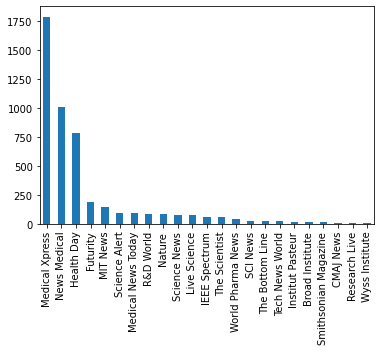

In [68]:
X_train.crawler.value_counts().plot(kind='bar')

<AxesSubplot:>

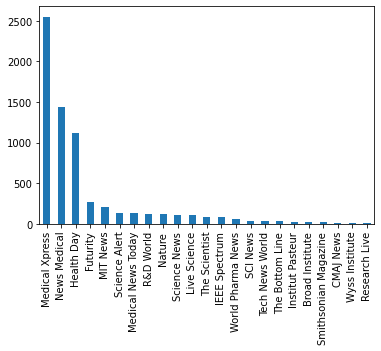

In [63]:
data.crawler.value_counts().plot(kind='bar')

<AxesSubplot:>

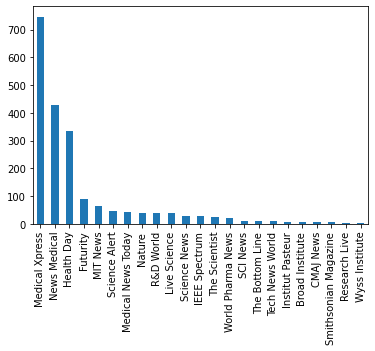

In [64]:
X_teste.crawler.value_counts().plot(kind='bar')

In [73]:
X_teste.to_csv('./data/teste.csv')

In [ ]:
X_train.to_csv('./data/train.csv')